In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers.merge import concatenate

In [3]:
mit_test_data = pd.read_csv('C:/Users/Jell/Desktop/Thesis/Thesis Rework-Neural Networks/NN Rework/Data/mitbih_test.csv', header=None)
mit_train_data = pd.read_csv('C:/Users/Jell/Desktop/Thesis/Thesis Rework-Neural Networks/NN Rework/Data/mitbih_train.csv', header=None)

In [4]:
mit_train_data[187]=mit_train_data[187].astype(int)
equilibre=mit_train_data[187].value_counts()
print(equilibre)


0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [5]:
from sklearn.utils import resample
df_1=mit_train_data[mit_train_data[187]==1]
df_2=mit_train_data[mit_train_data[187]==2]
df_3=mit_train_data[mit_train_data[187]==3]
df_4=mit_train_data[mit_train_data[187]==4]
df_0=(mit_train_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

mit_train_data=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [6]:
equilibre=mit_train_data[187].value_counts()
print(equilibre)


4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


In [7]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(187,1)))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(5, activation = 'softmax'))

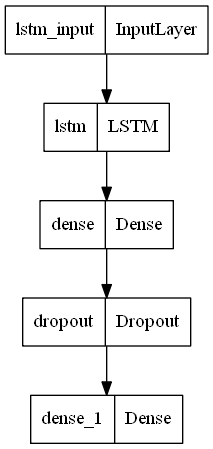

In [8]:
plot_model(lstm_model)

In [9]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.utils import to_categorical
X, y = mit_train_data.iloc[: , :-1], mit_train_data.iloc[: , -1]
X, valX, y, valy= train_test_split(X,y,test_size=0.2)
testX, testy = mit_test_data.iloc[: , :-1], mit_test_data.iloc[: , -1]
y = to_categorical(y)
testy = to_categorical(testy)
valy=to_categorical(valy)

In [11]:
from sklearn.utils import shuffle
mit_train_data[187] = mit_train_data[187].astype('int32')
mit_test_data[187] = mit_test_data[187].astype('int32')
X_train = np.array(mit_train_data.iloc[:, :187])
X_test = np.array(mit_test_data.iloc[:, :187])
y_train = np.array(mit_train_data[187])
y_test = np.array(mit_test_data[187])
X_train, y_train = shuffle(X_train, y_train, random_state = 101)
X_test, y_test = shuffle(X_test, y_test, random_state = 101)
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 187, 1)
(21892, 187, 1)
(100000, 5)
(21892, 5)


In [12]:
lstm_model_history = lstm_model.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/20
1000/1000 [==============================] - 178s 176ms/step - loss: 1.1931 - accuracy: 0.5080 - val_loss: 1.3400 - val_accuracy: 0.4223
Epoch 2/20
1000/1000 [==============================] - 165s 165ms/step - loss: 0.8949 - accuracy: 0.6642 - val_loss: 0.9006 - val_accuracy: 0.7319
Epoch 3/20
1000/1000 [==============================] - 156s 156ms/step - loss: 0.8292 - accuracy: 0.6987 - val_loss: 1.0192 - val_accuracy: 0.6568
Epoch 4/20
1000/1000 [==============================] - 159s 159ms/step - loss: 0.7926 - accuracy: 0.7137 - val_loss: 0.8283 - val_accuracy: 0.7266
Epoch 5/20
1000/1000 [==============================] - 179s 179ms/step - loss: 0.8730 - accuracy: 0.6782 - val_loss: 1.2938 - val_accuracy: 0.4688
Epoch 6/20
1000/1000 [==============================] - 159s 159ms/step - loss: 0.9127 - accuracy: 0.6614 - val_loss: 0.9596 - val_accuracy: 0.7197
Epoch 7/20
1000/1000 [==============================] - 161s 161ms/step - loss: 0.7596 - accuracy: 0.7310 - val_

Text(0, 0.5, 'Accuracy')

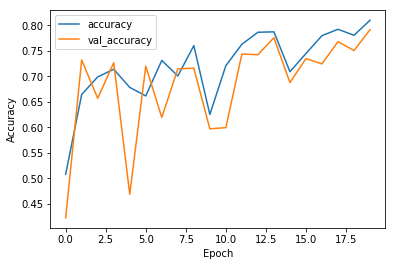

In [13]:
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

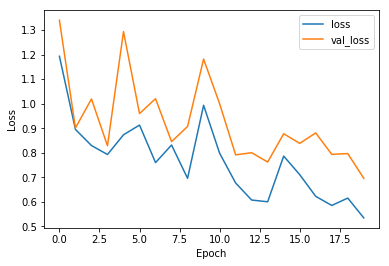

In [14]:
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [15]:
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
prediction_proba=lstm_model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_true,prediction))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     18118
           1       0.14      0.73      0.24       556
           2       0.66      0.72      0.69      1448
           3       0.20      0.81      0.32       162
           4       0.69      0.90      0.78      1608

   micro avg       0.79      0.79      0.79     21892
   macro avg       0.53      0.79      0.58     21892
weighted avg       0.90      0.79      0.83     21892



In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, prediction)

0.9563767586332907

In [18]:
def evaluate_model(lstm_model_history,testX,testy,history):
    scores = model.evaluate((testX),testy, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(lstm_model_history.history['accuracy'])
    plt.plot(lstm_model_history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(lstm_model_history.history['loss'])
    plt.plot(lstm_model_history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(testX)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

Normalized confusion matrix


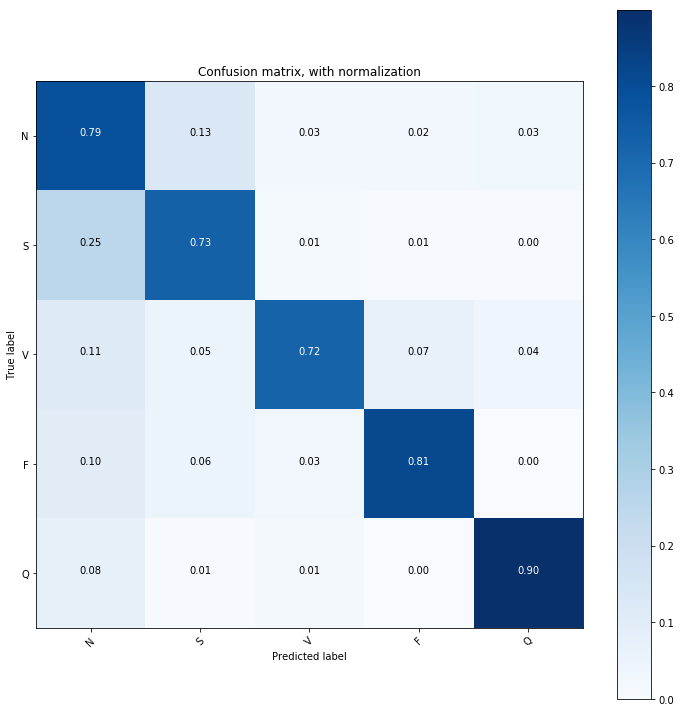

In [19]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()



In [20]:
# Save Model
from keras.models import load_model

lstm_model.save('ecg_arrhythmia.hdf5')  # creates a HDF5 file 'my_model.h5'
# deletes the existing model
# returns a compiled model
# identical to the previous one
lstm_model = load_model('ecg_arrhythmia.hdf5')

In [21]:
!pip install tinyml

In [22]:
!pip install tensorflow

In [23]:
from tensorflow import lite
import tensorflow as tf
converter = lite.TFLiteConverter.from_keras_model(lstm_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()
open('image_model.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\Jell\AppData\Local\Temp\tmptp2os45l\assets


INFO:tensorflow:Assets written to: C:\Users\Jell\AppData\Local\Temp\tmptp2os45l\assets


40168

In [24]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(lstm_model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


TypeError: Expected binary or unicode string, got <keras.engine.sequential.Sequential object at 0x00000226D96622E8>

In [ ]:
from tinymlgen import port
c_code = port(lstm_model, variable_name='ecg_arrhythmia', pretty_print=True, optimize=False) 

with open('ecg_arrhythmia.h', 'w') as f:
    print(c_code, file=f)

In [ ]:
saver = tf.keras.Model.save_weights(lstm_model)

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(lstm_model)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(500):
    yield([x_train[i].reshape(1, 1)])
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

In [ ]:
xxd -i converted_model.tflite > model_data.cc

In [ ]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {lstm_model} > {lstm_model}
# Update variable names